In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline

In [213]:
df = pd.read_csv("D:\IDS PROJECT\laptops.csv",sep=',')

In [214]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,2.037608,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860000,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.860000,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,1803.60


In [126]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')  # mean is used to fill all the NaN values
df['Weight'] = imputer.fit_transform(df[['Weight']])

In [127]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0,0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,2.037608,1339.69
1,1,1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,898.94
2,2,2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860000,575.00
3,3,3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.860000,2537.45
4,4,4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,1803.60


In [128]:
df['Ram'] = pd.to_numeric(df['Ram'])
df['Weight'] = pd.to_numeric(df['Weight'])
df['Inches']=pd.to_numeric(df['Inches'])

In [129]:
unique_Company = list(df['Company'].unique())
Ram = []

for Company in unique_Company:
    x = df[df['Company'] == Company]
    average_Ram = x['Ram'].sum()/len(x)
    Ram.append(average_Ram)
data = pd.DataFrame({'Company':unique_Company, 'Ram':Ram})
new_index = (data['Ram'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

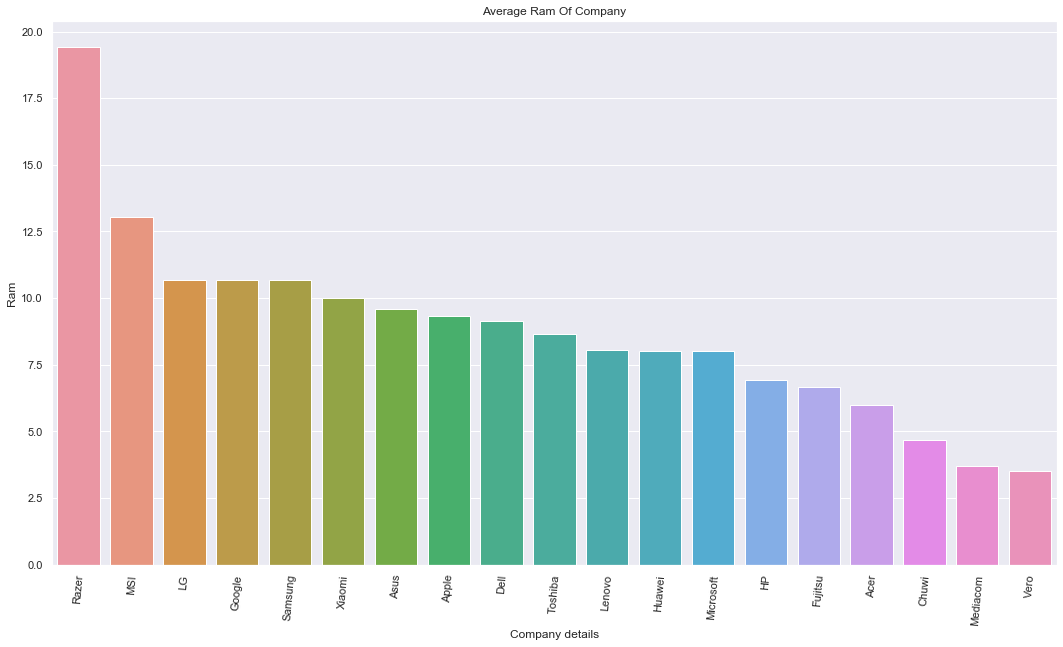

In [130]:
plt.figure(figsize=(18,10))
sns.barplot(x=sorted_data['Company'], y=sorted_data['Ram'])

plt.xticks(rotation = 85)
plt.xlabel('Company details')
plt.ylabel('Ram')
plt.title('Average Ram Of Company')
plt.show()

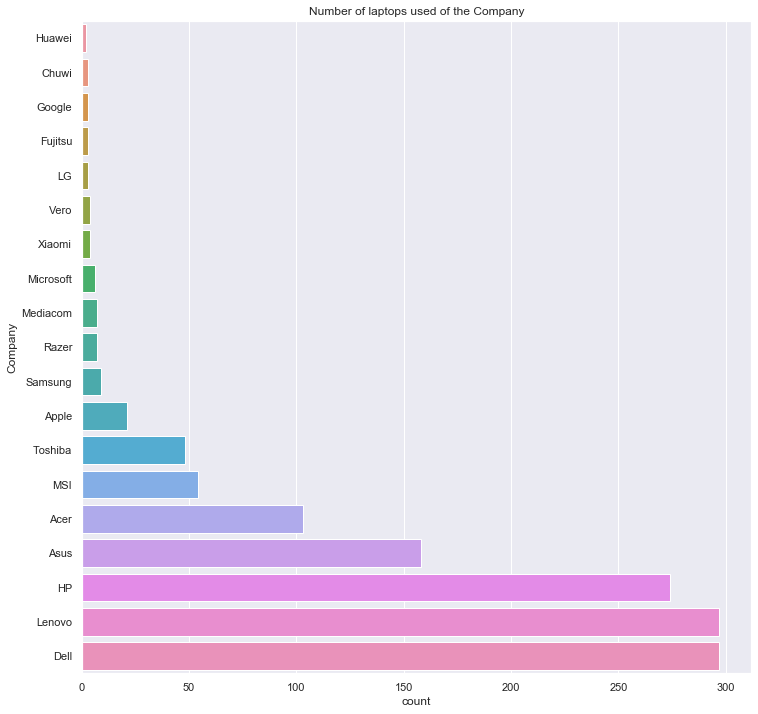

In [131]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,12))
sns.countplot(y='Company',data=df,order=df['Company'].value_counts(ascending=True).index)
plt.title('Number of laptops used of the Company')
plt.show()

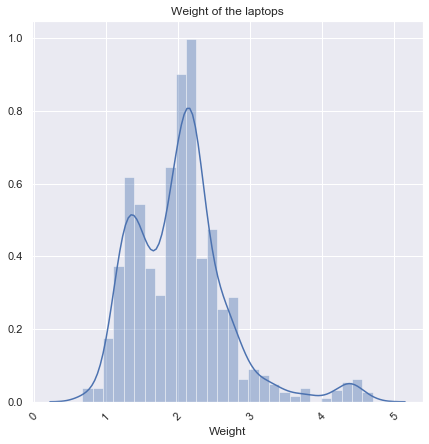

In [132]:
sns.set(style='darkgrid')
plt.figure(figsize=(7,7))
sns.distplot(df['Weight'])
plt.xticks(rotation=45)
plt.title('Weight of the laptops')
plt.show()

In [133]:
from sklearn import preprocessing
std_scale=  preprocessing.StandardScaler().fit(df[['Ram','Weight','Inches']])

In [134]:
std_minmax=  preprocessing.MinMaxScaler().fit(df[['Ram','Weight','Inches']])

In [135]:
df_std = std_scale.transform (df[['Ram','Weight','Inches']])

In [136]:
df_minmax = std_minmax.transform(df[['Ram','Weight','Inches']])

In [137]:
print (df_std[:,0].mean(),df_std[:,1].mean(),df_std[:,2].mean())

-5.453129207675366e-17 -1.9631265147631317e-16 3.0919242607519323e-15


In [138]:
num=df._get_numeric_data()

In [139]:
print (num)

      Unnamed: 0  Unnamed: 0.1  Inches  Ram    Weight  Price_euros
0              0             0    13.3    8  2.037608      1339.69
1              1             1    13.3    8  1.340000       898.94
2              2             2    15.6    8  1.860000       575.00
3              3             3    15.4   16  1.860000      2537.45
4              4             4    13.3    8  1.370000      1803.60
...          ...           ...     ...  ...       ...          ...
1298        1298          1298    14.0    4  1.800000       638.00
1299        1299          1299    13.3   16  1.300000      1499.00
1300        1300          1300    14.0    2  1.500000       229.00
1301        1301          1301    15.6    6  2.190000       764.00
1302        1302          1302    15.6    4  2.200000       369.00

[1303 rows x 6 columns]


In [140]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Ram', 'Weight','Inches']])
df_std = std_scale.transform(df[['Ram', 'Weight','Inches']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Ram', 'Weight','Inches']])
df_minmax = minmax_scale.transform(df[['Ram', 'Weight','Inches']])


print('Mean after standardization:\nRam={:.2f}, Weight={:.2f},Inches={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(),df_std[:,2].mean()))
print('\nStandard deviation after standardization:\nRam={:.2f}, Weight={:.2f},Inches={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(),df_std[:,2].std()))


Mean after standardization:
Ram=-0.00, Weight=-0.00,Inches=0.00

Standard deviation after standardization:
Ram=1.00, Weight=1.00,Inches=1.00


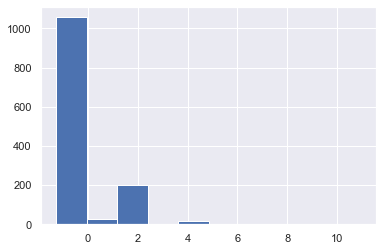

In [141]:
my=pd.Series(df_std[:,0])
from matplotlib import pyplot
my.hist()
pyplot.show()

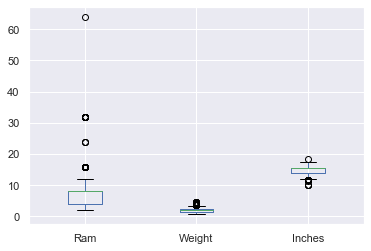

In [142]:
boxplot=df.boxplot(column=['Ram','Weight','Inches'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002689084FF88>]],
      dtype=object)

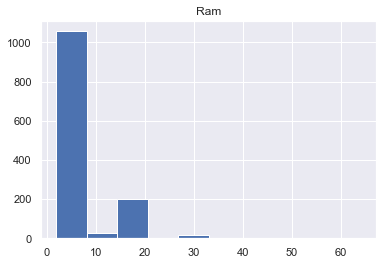

In [143]:
df.hist(column='Ram')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026890B0BF48>]],
      dtype=object)

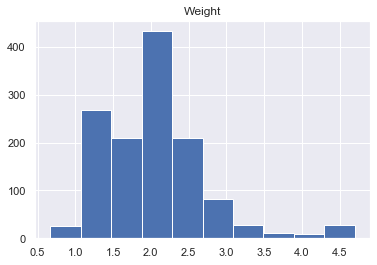

In [144]:
df.hist(column='Weight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026890B88AC8>]],
      dtype=object)

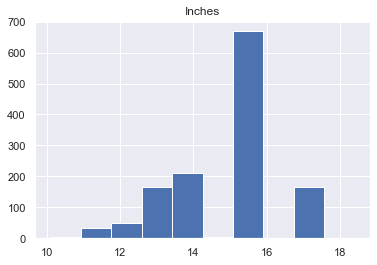

In [145]:
df.hist(column='Inches')

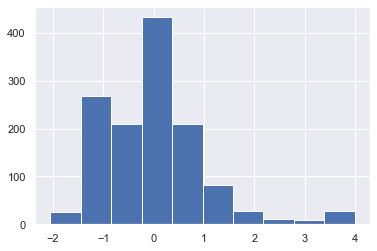

In [148]:
my=pd.Series(df_std[:,1])
from matplotlib import pyplot
my.hist()
pyplot.show()

In [149]:
import pandas as pd
df=pd.read_csv("D:\IDS PROJECT\laptops.csv",sep=',')
sample=df.sample(n=600)


In [150]:
sample.head()

,Unnamed: 0,Unnamed: 0.1,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
891,891,891,HP,Envy x360,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,1399.00
381,381,381,Lenovo,V310-15ISK (i3-6006U/4GB/128GB/FHD/No,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,1.85,403.50
397,397,397,Lenovo,ThinkPad L470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,938.00
299,299,299,Asus,ZenBook UX530UQ-PRO,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,1468.00
305,305,305,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,No OS,2.20,359.99


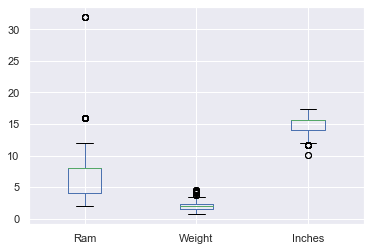

In [151]:
boxplot=sample.boxplot(column=['Ram','Weight','Inches'])

In [153]:
meanofsample=np.average(sample['Inches'])
print("Mean of sample",meanofsample)

Mean of sample 14.999833333333333


In [154]:
mean=np.average(df['Inches'])
print(mean)

15.017191097467379


In [155]:
std_sample=np.std(sample['Inches'])
print(std_sample)

1.4177388001869566


In [156]:
se=std_sample/np.sqrt(df.size)
print(se)

0.010496874369819423


In [157]:
z_norm_deviate=(meanofsample-mean)/se
print(z_norm_deviate)

-1.6536126395827335


In [159]:
import scipy
p_value = scipy.stats.norm.sf(abs(z_norm_deviate))*2 
print(p_value)

0.09820624288539094


In [161]:
corr=sample.corr(method="pearson")

In [162]:
corr

,Unnamed: 0,Unnamed: 0.1,Inches,Ram,Weight,Price_euros
Unnamed: 0,1.000000,1.000000,-0.126760,-0.031824,-0.050811,0.064229
Unnamed: 0.1,1.000000,1.000000,-0.126760,-0.031824,-0.050811,0.064229
Inches,-0.126760,-0.126760,1.000000,0.235443,0.826975,0.063682
Ram,-0.031824,-0.031824,0.235443,1.000000,0.359837,0.728810
Weight,-0.050811,-0.050811,0.826975,0.359837,1.000000,0.181099
Price_euros,0.064229,0.064229,0.063682,0.728810,0.181099,1.000000


In [164]:
from scipy import stats
stats.pearsonr (sample['Ram'],sample['Inches'])

(0.23544268180666536, 5.303004291696429e-09)

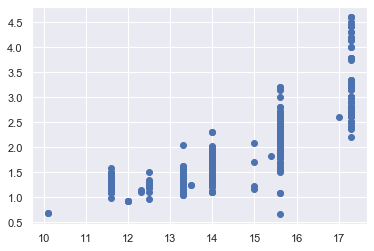

In [169]:
from matplotlib import pyplot
pyplot.scatter(sample['Inches'],sample['Weight'])

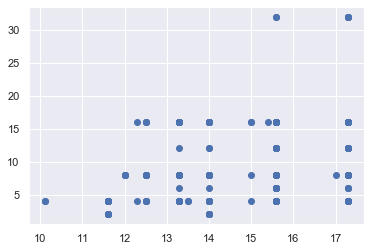

In [170]:
from matplotlib import pyplot
pyplot.scatter(sample['Inches'],sample['Ram'])

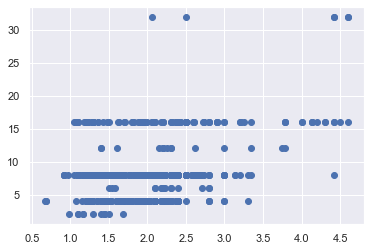

In [171]:
from matplotlib import pyplot
pyplot.scatter(sample['Weight'],sample['Ram'])

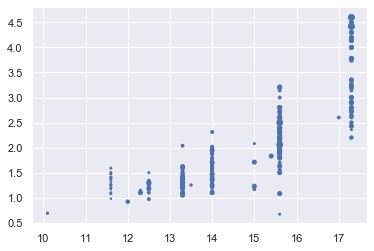

In [175]:
from matplotlib import pyplot
pyplot.scatter(sample['Inches'],sample['Weight'],sample['Ram'])

In [178]:
sample=df
Company=sample['Company']
Product=sample['Product']
TypeName=sample['TypeName']
ScreenResolution=sample['ScreenResolution']
Inches=sample['Inches']
Cpu=sample['Cpu']
Ram=sample['Ram']
Memory=sample['Memory']
Gpu=sample['Gpu']
OpSys=sample['OpSys']
Weight=sample['Weight']
Price_euros=sample['Price_euros']

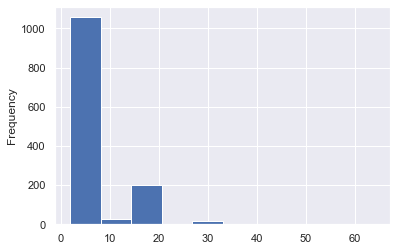

In [183]:
import matplotlib.pyplot as plt
type(Ram)
#histogram
Ram.plot.hist()
plt.savefig('D:\IDS PROJECT\Ram_hist.jpg')

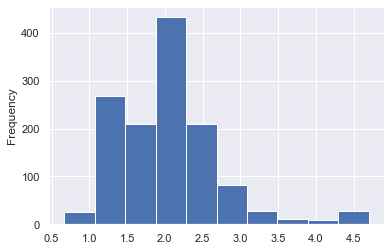

In [184]:
type(Weight)
Weight.plot.hist()
plt.savefig('D:\IDS PROJECT\Weight_hist.jpg')

In [185]:
import seaborn as sns

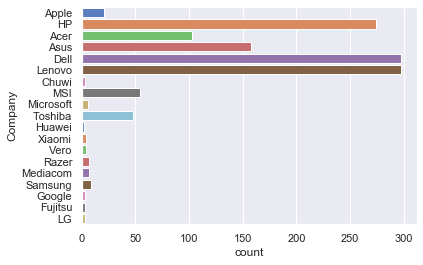

In [186]:
s=sns.countplot(y='Company', data=sample, palette="muted")
plt.savefig('D:\IDS PROJECT\Company_countplot.jpg')

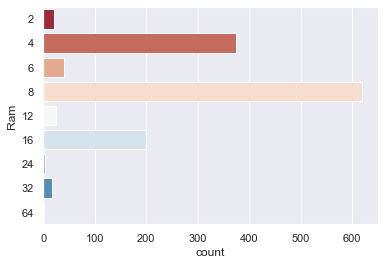

In [187]:
s=sns.countplot(y='Ram', data=sample, palette="RdBu")
plt.savefig('D:\IDS PROJECT\Ram_countplot.jpg')

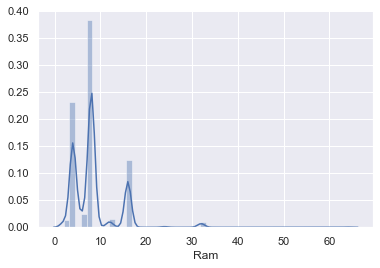

In [188]:
#distribution
sns.distplot(sample['Ram'])
plt.savefig('D:\IDS PROJECT\Ram_distplot.jpg')

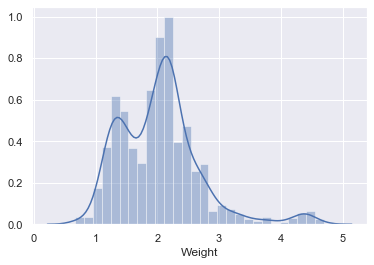

In [189]:
#distribution
sns.distplot(sample['Weight'])
plt.savefig('D:\IDS PROJECT\Weight_distplot.jpg')

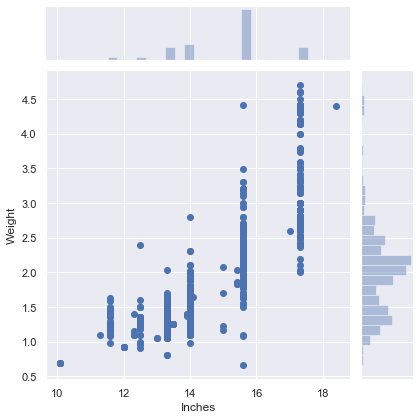

In [193]:
#scatter plot
sns.jointplot(x='Inches',y='Weight',data=sample,kind='scatter')
plt.savefig('D:\IDS PROJECT\Inchesweight_scatterplot.jpg')

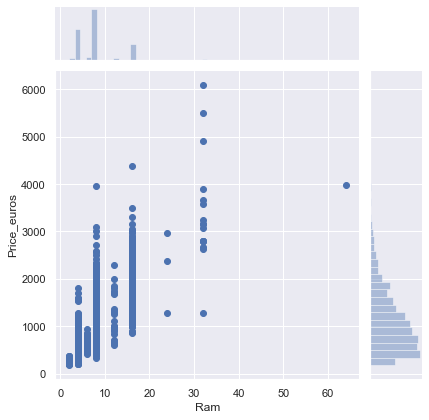

In [194]:
#scatter plot
sns.jointplot(x='Ram',y='Price_euros',data=sample,kind='scatter')
plt.savefig('D:\IDS PROJECT\Ram_price_euros_scatterplot.jpg')

In [195]:
#qqpplot
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot 

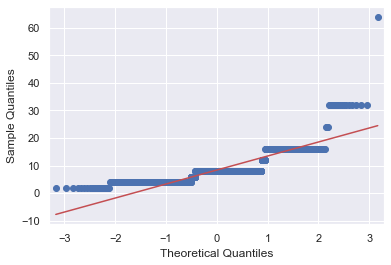

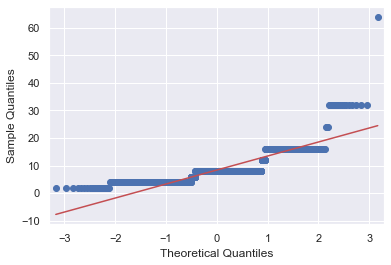

In [196]:
qqplot(sample['Ram'],line='s')

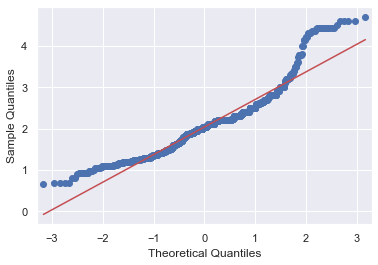

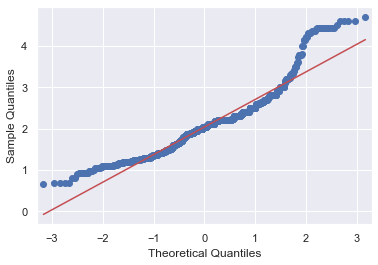

In [197]:
qqplot(sample['Weight'],line='s')

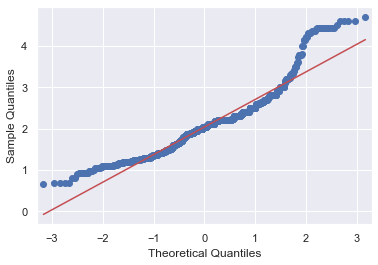

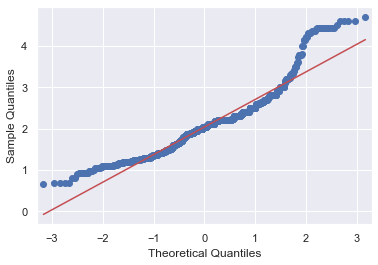

In [198]:
qqplot(sample['Weight'],line='s')

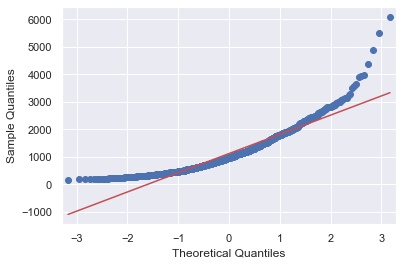

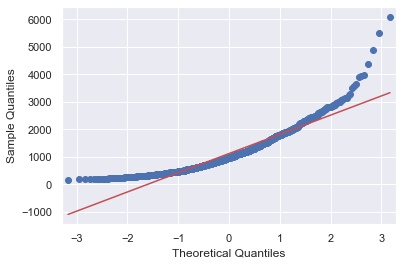

In [199]:
qqplot(sample['Price_euros'],line='s')

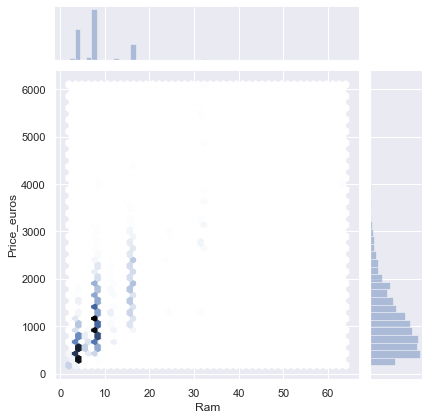

In [200]:
#hexaplot
sns.jointplot(x='Ram',y='Price_euros',data=sample,kind='hex')

In [201]:
from scipy.stats import norm
from math import sqrt

In [202]:
sam=df.sample(500)

In [203]:
sam['Ram'].mean()

8.244

In [204]:
#hypothesis testing
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = sam['Ram'].mean()
pop_mean = sample['Ram'].mean()
sample_size =  500
std_dev = sample['Ram'].std()

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 8.382194934765925
H1 : μ != 8.382194934765925
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : -0.6077357861987303 

Failed to reject NULL hypothesis


In [205]:
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean =sam['Weight'].mean()
pop_mean = sample['Weight'].mean()
sample_size =  500
std_dev =sample['Weight'].std()

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 2.037607692307692
H1 : μ > 2.037607692307692
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -0.14091524420982696 

Failed to reject NULL hypothesis


In [206]:
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = sam['Inches'].mean()
pop_mean = sample['Inches'].mean()
sample_size =  500
std_dev = sample['Inches'].std()

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 15.017191097467265
H1 : μ != 15.017191097467265
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 0.21962258505290053 

Failed to reject NULL hypothesis


In [207]:
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE

Coefficients: 
 [0.0023488]
RMSE: 26.99


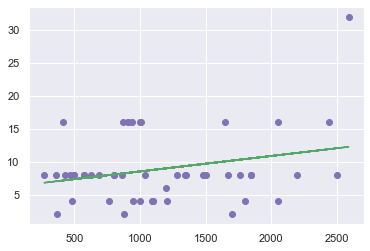

In [210]:
#linear regression
def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='m')
    plt.plot(x, y_preds, color='g')
    plt.show()
    
y = sample['Ram'].sample(50)
x = sample['Price_euros'].sample(50)
linear_regression(x, y)

Coefficients: 
 [-0.02470609]
RMSE: 0.45


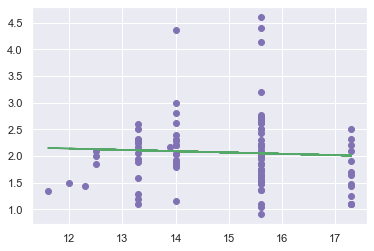

In [212]:
def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='m')
    plt.plot(x, y_preds, color='g')
    plt.show()
    
x = sample['Inches'].sample(100)
y = sample['Weight'].sample(100)
linear_regression(x, y)

In [ ]:
#df.to_csv()